In [1]:
# Nadhifa Sofia | created at April 4, 2020
# Importing the Libraries for this Linear Regression Project

import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

In [32]:
# Importing the Dataset
# Dataset is scraped from https://www.the-numbers.com/movie/budgets/all
movie = pd.read_csv("movie_dataset.csv")
movie.head()

,ReleaseDate,MovieTitle,No,href,href 2,P,data 3,Unnamed: 7
0,ReleaseDate,Movie,NaN,NaN,NaN,NaN,NaN,NaN
1,"Apr 23, 2019",Avengers: Endgame,1.0,https://www.the-numbers.com/box-office-chart/d...,https://www.the-numbers.com/movie/Avengers-End...,"$400,000,000","$858,373,000","$2,797,800,564"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,2.0,https://www.the-numbers.com/box-office-chart/d...,https://www.the-numbers.com/movie/Pirates-of-t...,"$379,000,000","$241,063,875","$1,045,663,875"
3,"Apr 22, 2015",Avengers: Age of Ultron,3.0,https://www.the-numbers.com/box-office-chart/d...,https://www.the-numbers.com/movie/Avengers-Age...,"$365,000,000","$459,005,868","$1,403,013,963"
4,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,4.0,https://www.the-numbers.com/box-office-chart/d...,https://www.the-numbers.com/movie/Star-Wars-Ep...,"$306,000,000","$936,662,225","$2,068,223,624"


In [3]:
# Delete the first row of data since it is not useful
movie = movie.drop(movie.index[0])
movie.head()

,ReleaseDate,MovieTitle,No,href,href 2,P,data 3,Unnamed: 7
1,"Apr 23, 2019",Avengers: Endgame,1.0,https://www.the-numbers.com/box-office-chart/d...,https://www.the-numbers.com/movie/Avengers-End...,"$400,000,000","$858,373,000","$2,797,800,564"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,2.0,https://www.the-numbers.com/box-office-chart/d...,https://www.the-numbers.com/movie/Pirates-of-t...,"$379,000,000","$241,063,875","$1,045,663,875"
3,"Apr 22, 2015",Avengers: Age of Ultron,3.0,https://www.the-numbers.com/box-office-chart/d...,https://www.the-numbers.com/movie/Avengers-Age...,"$365,000,000","$459,005,868","$1,403,013,963"
4,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,4.0,https://www.the-numbers.com/box-office-chart/d...,https://www.the-numbers.com/movie/Star-Wars-Ep...,"$306,000,000","$936,662,225","$2,068,223,624"
5,"Apr 25, 2018",Avengers: Infinity War,5.0,https://www.the-numbers.com/box-office-chart/d...,https://www.the-numbers.com/movie/Avengers-Inf...,"$300,000,000","$678,815,482","$2,048,359,754"


In [4]:
# Check attribute names
movie.columns.values

array(['ReleaseDate', ' MovieTitle', 'No', ' href', ' href 2', 'P',
       'data 3', 'Unnamed: 7'], dtype=object)

In [5]:
# Check data types of each attribute
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ReleaseDate  100 non-null    object 
 1    MovieTitle  100 non-null    object 
 2   No           100 non-null    float64
 3    href        100 non-null    object 
 4    href 2      100 non-null    object 
 5   P            100 non-null    object 
 6   data 3       100 non-null    object 
 7   Unnamed: 7   100 non-null    object 
dtypes: float64(1), object(7)
memory usage: 7.0+ KB


In [7]:
# 1. DATA PREPROCESSING
# Delete unused attribute, as we want to make relationship prediction between Prod Budget and Worldwide Gross
movie.drop(['ReleaseDate', ' MovieTitle', 'No', ' href', ' href 2', 'Unnamed: 7'], axis=1, inplace=True)
movie.head()

,P,data 3
1,"$400,000,000","$858,373,000"
2,"$379,000,000","$241,063,875"
3,"$365,000,000","$459,005,868"
4,"$306,000,000","$936,662,225"
5,"$300,000,000","$678,815,482"


In [8]:
# Rename the attribute names
movie = movie.rename(columns={'P':'Production Budget ($)',
                              'data 3':'Worldwide Gross ($)'})

In [9]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Production Budget ($)  100 non-null    object
 1   Worldwide Gross ($)    100 non-null    object
dtypes: object(2)
memory usage: 2.3+ KB


In [10]:
# Change the datatypes into integer
movie['Production Budget ($)'] = movie['Production Budget ($)'].str.replace(',','').str.replace('$','').astype(int)
movie['Worldwide Gross ($)'] = movie['Worldwide Gross ($)'].str.replace(',','').str.replace('$','').astype(int)

In [11]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Production Budget ($)  100 non-null    int64
 1   Worldwide Gross ($)    100 non-null    int64
dtypes: int64(2)
memory usage: 2.3 KB


In [12]:
movie.describe()

,Production Budget ($),Worldwide Gross ($)
count,1.000000e+02,1.000000e+02
mean,2.181120e+08,2.811300e+08
std,4.270376e+07,1.928060e+08
min,1.790000e+08,0.000000e+00
25%,1.900000e+08,1.412476e+08
50%,2.000000e+08,2.342000e+08
75%,2.300000e+08,3.600505e+08
max,4.000000e+08,9.366622e+08


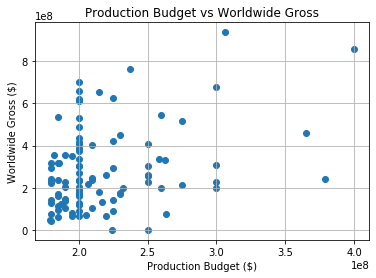

In [18]:
# 2. DATA VISUALIZATION
X = movie.iloc[:,0]
Y = movie.iloc[:,1]

plt.scatter(X, Y)
plt.title('Production Budget vs Worldwide Gross')
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')
plt.grid(True)
plt.show()

In [19]:
# 3. DATA MODELING
# Reshape the data
X = X.values.reshape(-1,1)
Y = Y.values.reshape(-1,1)

In [20]:
# Select the Train Set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                   Y,
                                                   test_size = 1/3,
                                                   random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(66, 1)
(34, 1)
(66, 1)
(34, 1)


In [21]:
# Model Fitting by using Linear Regression
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
# Define the prediction
y_train_predict = regressor.predict(X_train)
y_test_predict = regressor.predict(X_test)

In [24]:
# 4. EVALUATION
from sklearn.metrics import mean_squared_error, r2_score

rmse_train = (np.sqrt(mean_squared_error(X_train, y_train_predict)))
rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2_test = r2_score(Y_test, y_test_predict)

In [25]:
print('Error training data: ', rmse_train)
print('Error testing data: ', rmse_test)
print('Squared loss: ', r2_test)
print('The modeling score: ',regressor.score(Y_test, y_test_predict))
print(regressor.coef_)
print(regressor.intercept_)

Error training data:  322994093.18958825
Error testing data:  155384616.520422
Squared loss:  0.395888277551816
The modeling score:  1.0
[[1.59213505]]
[-71579532.80440217]


In [26]:
Y_test

array([[623357910],
       [113929605],
       [459005868],
       [304360277],
       [202359711],
       [234037575],
       [302089278],
       [353007020],
       [334191110],
       [140125968],
       [373524485],
       [241407328],
       [101802906],
       [200821936],
       [200074175],
       [ 89302115],
       [200120000],
       [172558876],
       [ 65233400],
       [515202542],
       [700059566],
       [173956935],
       [936662225],
       [ 80101125],
       [620181382],
       [486295561],
       [229024295],
       [ 47482519],
       [317101119],
       [144840419],
       [202853933],
       [318604126],
       [315058289],
       [ 90759676]])

In [27]:
y_test_predict

array([[9.20890444e+08],
       [1.09811784e+08],
       [6.59219798e+08],
       [4.13003132e+08],
       [2.50604456e+08],
       [3.01039893e+08],
       [4.09387395e+08],
       [4.90455316e+08],
       [4.60497847e+08],
       [1.51519932e+08],
       [5.23121892e+08],
       [3.12773535e+08],
       [9.05044420e+07],
       [2.48156110e+08],
       [2.46965574e+08],
       [7.06014945e+07],
       [2.47038533e+08],
       [2.03157502e+08],
       [3.22808497e+07],
       [7.48692492e+08],
       [1.04300984e+09],
       [2.05383401e+08],
       [1.41971323e+09],
       [5.59522758e+07],
       [9.15832983e+08],
       [7.02668674e+08],
       [2.93058074e+08],
       [4.01904994e+06],
       [4.33288273e+08],
       [1.59025975e+08],
       [2.51391324e+08],
       [4.35681263e+08],
       [4.30035812e+08],
       [7.29221284e+07]])

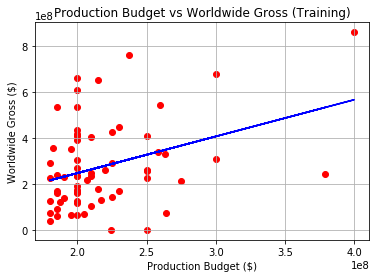

In [29]:
# Visualization on Training Data Set
plt.scatter(X_train, Y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Production Budget vs Worldwide Gross (Training)')
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')
plt.grid(True)
plt.show()

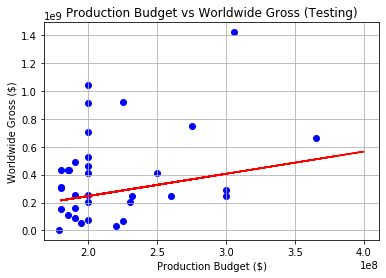

In [31]:
# Visualization on Training Data Set
plt.scatter(X_test, y_test_predict, color='blue')
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.title('Production Budget vs Worldwide Gross (Testing)')
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')
plt.grid(True)
plt.show()